# Exploratory Data Analysis - Jigsaw Toxic Comment Dataset

### 1. Loading datasets

In [5]:
import pandas as pd

train_df = pd.read_csv("/kaggle/input/toxic-comment/train.csv", on_bad_lines='warn')
test_df = pd.read_csv("/kaggle/input/toxic-comment/test.csv")
test_labels_df = pd.read_csv("/kaggle/input/toxic-comment/test_labels.csv")

print("Sample Data: ")
train_df.head()

Sample Data: 


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### 2. Basic Info & Missing Values 

In [9]:

print("\nDataset Info: ") 
print(train_df.info)

print("\nMissing Values: ")  
print(train_df.isnull().sum())


Dataset Info: 
<bound method DataFrame.info of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

   

### 3. Label Overview


Number of comments: 159571
Number of toxic labels: 6


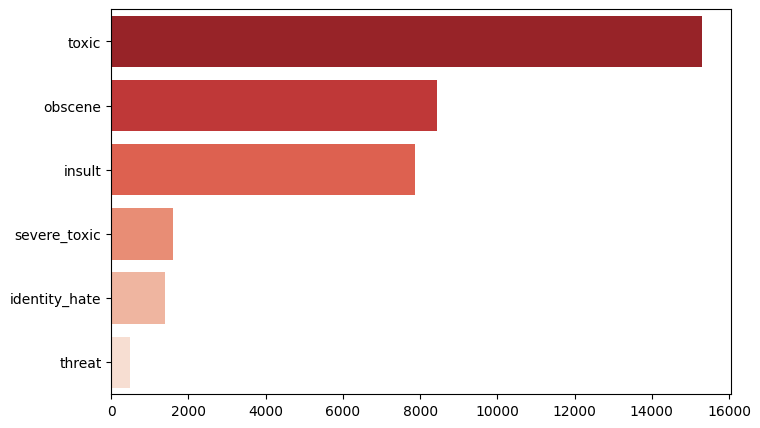

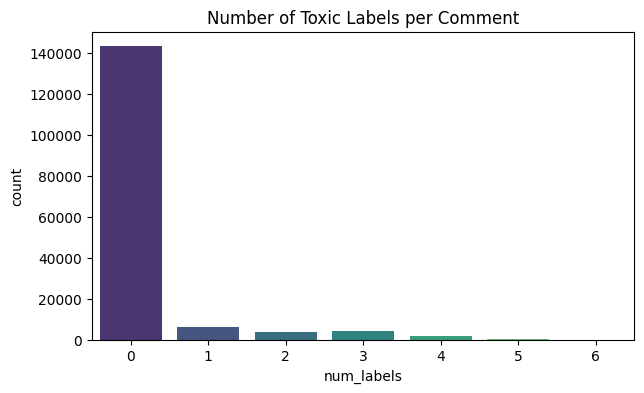

In [15]:

import matplotlib.pyplot as plt 
import seaborn as sns

# List of labels for classification
labels = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

print(f"Number of comments: {len(train_df)}") 
print(f"Number of toxic labels: {len(labels)}")

# Check class imbalance 
label_counts = train_df[labels].sum().sort_values(ascending=False) 

plt.figure(figsize=(8,5)) 
sns.barplot(x=label_counts.values, y=label_counts.index, palette="Reds_r") 

# Multilabel distribution (how many labels per comment)
train_df['num_labels'] = train_df[labels].sum(axis=1)
plt.figure(figsize=(7,4))
sns.countplot(x='num_labels', data=train_df, palette='viridis')
plt.title("Number of Toxic Labels per Comment")
plt.show()

### 4. Comment Length Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


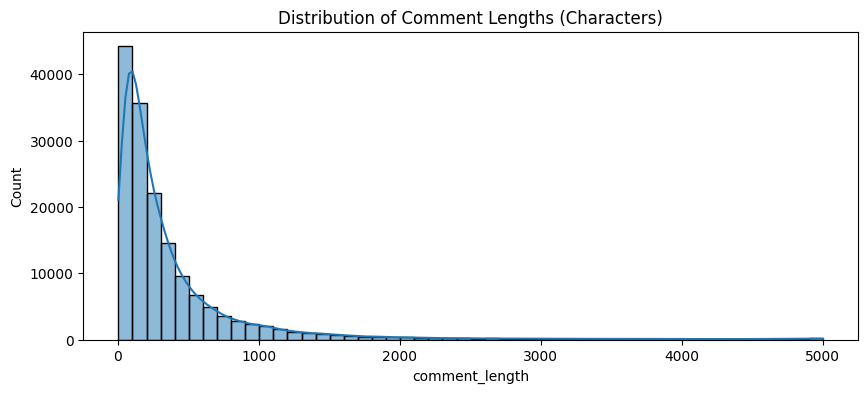

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


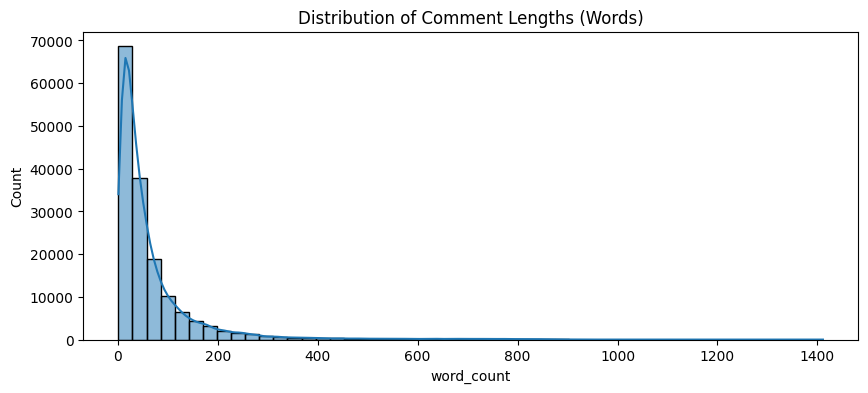

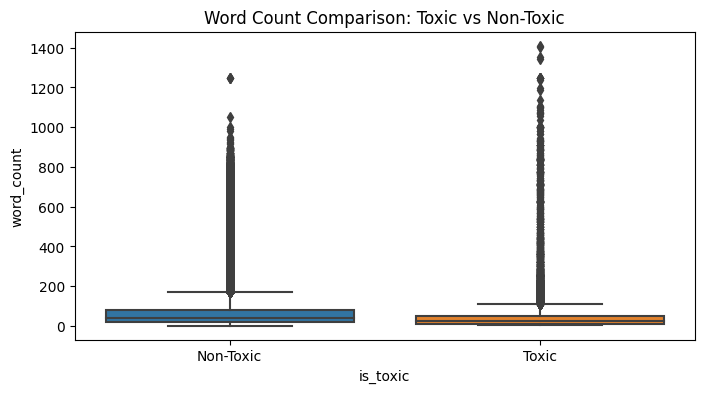

In [18]:

train_df['comment_length'] = train_df['comment_text'].astype(str).apply(len)
train_df['word_count'] = train_df['comment_text'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(10,4))
sns.histplot(train_df['comment_length'], bins=50, kde=True)
plt.title("Distribution of Comment Lengths (Characters)")
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(train_df['word_count'], bins=50, kde=True)
plt.title("Distribution of Comment Lengths (Words)")
plt.show()

# Compare toxic vs non-toxic
train_df['is_toxic'] = (train_df[labels].sum(axis=1) > 0).astype(int)
plt.figure(figsize=(8,4))
sns.boxplot(x='is_toxic', y='word_count', data=train_df)
plt.title("Word Count Comparison: Toxic vs Non-Toxic")
plt.xticks([0,1], ['Non-Toxic', 'Toxic'])
plt.show()


### 5. Correlation between Labels

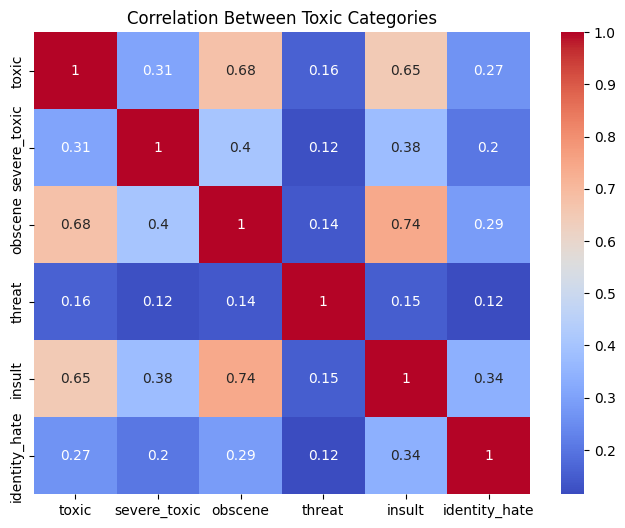

In [26]:

plt.figure(figsize=(8,6))
sns.heatmap(train_df[labels].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Toxic Categories")
plt.show()